In [7]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, scipy.stats as stats, glob
from pynwb import NWBHDF5IO
from pathlib import Path
from convnwb.io import load_nwbfile

df = pd.read_pickle('all_neur_tri_df.pkl')
df.head()


,subj,sess,neuron,region,start_time,stop_time,RT,trial_spikes,trial_aligned_spikes,num_spikes,FR,trial_smooth_spikes,trial_smooth_FR,stim_phase,stimulus_file,response_correct,response_confidence,actual_response
0,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,0.000000,478.855120,478.855120,"[3.43207675, 4.39507675, 5.16801325, 5.2624507...","[3.43207675, 4.39507675, 5.16801325, 5.2624507...",360,0.751793,"[0, 0, 0, 0, 0, 1, 1, 1, 1]",0.444444,encoding,bd_movie,NaN,NaN,NaN
1,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,566.346460,577.078362,10.731902,"[566.79785075, 568.845881, 569.40153725, 576.0...","[0.4513907499999732, 2.499420999999984, 3.0550...",4,0.372721,"[1, 0, 0, 1, 1, 1, 1, 0, 0]",0.555556,recognition,old015.png,1.0,2.0,5.0
2,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,578.122799,582.712578,4.589779,[582.05028225],[3.927483250000023],1,0.217875,"[0, 0, 0, 0, 0, 0, 1, 1, 0]",0.222222,recognition,new021.png,1.0,3.0,1.0
3,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,583.755203,591.685106,7.929903,[589.2551855],[5.499982499999987],1,0.126105,"[0, 0, 0, 0, 0, 0, 0, 0, 0]",0.000000,recognition,new030.png,0.0,3.0,6.0
4,P41,P41CS_R1,P41CS_R1_21_1_679_4,amygdala,592.728012,597.998541,5.270529,"[593.583746, 593.7849335]","[0.855733999999984, 1.0569214999999303]",2,0.379469,"[1, 2, 1, 0, 0, 0, 0, 0, 0]",0.444444,recognition,old012.png,0.0,3.0,1.0


In [8]:
print(len(df['trial_smooth_spikes'][0]))

9


confirm number of subjects, neurons, trials

In [9]:
num_neurons = len(np.unique(df['neuron']))
num_subjs = len(np.unique(df['subj']))
num_sess = len(np.unique(df['sess']))
print(f'neurons {num_neurons}, subjects {num_subjs}, sessions {num_sess}')


neurons 1457, subjects 16, sessions 29


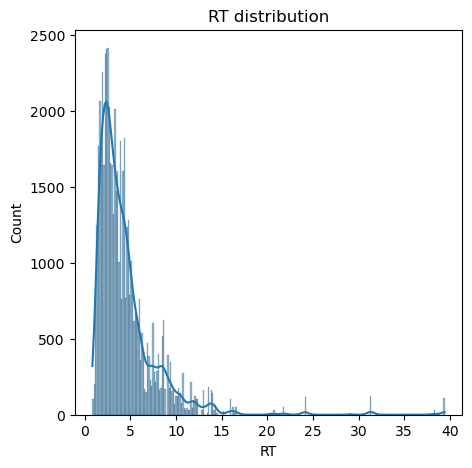

In [10]:
df_recognition = df[df['stim_phase'] == 'recognition']

plt.figure(figsize=(5,5))
sns.histplot(df_recognition['RT'], kde=True)
plt.title('RT distribution')
plt.show()

example cell raster & smooth FRs by region

58280 = 57992


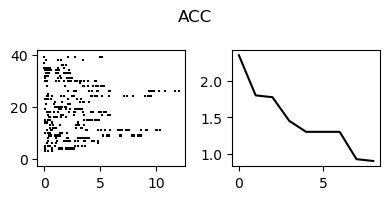

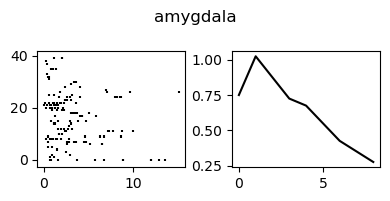

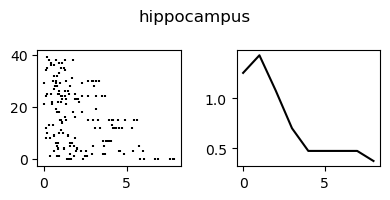

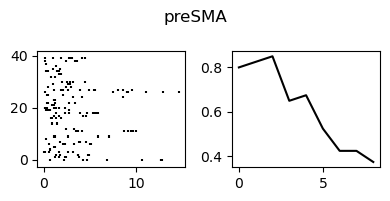

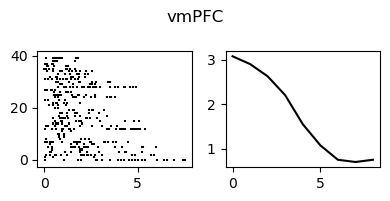

In [18]:
df_recognition = df[df['stim_phase'] == 'recognition']
print(f'{num_neurons*40 } = {len(df_recognition)}')

for region, region_df in df_recognition.groupby('region'):

    neuron_num = 0

    fig, ax = plt.subplots(1, 2, figsize=(4, 2))
    fig.suptitle(region)

    for neuron, neuron_df in region_df.groupby('neuron'):

        neuron_num+=1
        if neuron_num == 10:

            ax[0].eventplot(neuron_df['trial_aligned_spikes'], linelengths=0.8, color='black')
            ax[1].plot(np.mean(neuron_df['trial_smooth_spikes'], axis=0), color='black')

            break

    plt.tight_layout()
    plt.show()  


example trial-avged firing rate

In [ ]:

group df_recognition by df['sess'] and then avg df['trial_aligned_spikes'] after ensuring all of them are same size (maybe padding)

df['trial_aligned_spikes']

df_recognition = df[df['stim_phase'] == 'recognition']
print(len(df_recognition))

neuron_groups = df_recognition.groupby('neuron')
count = 0

plt.figure(figsize=(4, 10))
plt.suptitle('Recognition Raster Plots for Neurons', fontsize=16)

for name, group_df in neuron_groups:

    count+=1
    if count>5:
        break
    
    plt.subplot(5, 1, count)
    plt.eventplot(group_df['trial_aligned_spikes'], linelengths=0.8, color='black')

plt.tight_layout()
plt.show()


In [159]:
group_df['trial_aligned_spikes']


206    [5.397794999999974, 5.430857500000002, 5.44798...
207                                                   []
208                                  [5.335951249999994]
209                                                   []
210           [0.26367225000001326, 0.45082849999994323]
211                                                   []
212                                                   []
213                                  [4.970326500000056]
214                                                   []
215                                                   []
216                                                   []
217                                                   []
218                                                   []
219                                 [2.3607339999999795]
220            [0.11676624999995511, 0.3394537499999615]
221                                 [2.3100780000000896]
222                                                   []
223                            

# recognition trials with only 0<FR<20: 49508


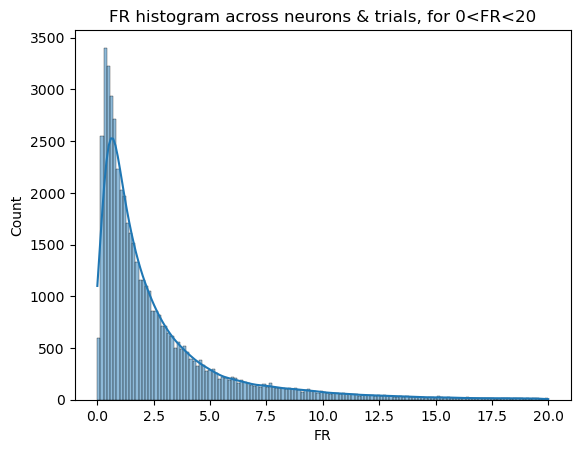

In [138]:
# discard outliers
z_scores = stats.zscore(df_recognition['FR'])
mask = (z_scores < 2) & (z_scores > -2)
df_recognition = df_recognition[mask]
df_recognition = df[df['FR'] != 0]
df_recognition = df[(df['FR'] > 0) & (df['FR'] < 20)]
print(f'# recognition trials with only 0<FR<20: {len(df_recognition)}')
sns.histplot(df_recognition['FR'], kde=True)
plt.title('FR histogram across neurons & trials, for 0<FR<20')
plt.show()

             Incorrect  Correct
region                         
ACC               2454     5216
amygdala          3431    12206
hippocampus       2129     6554
preSMA            2470     7743
vmPFC             1314     4550


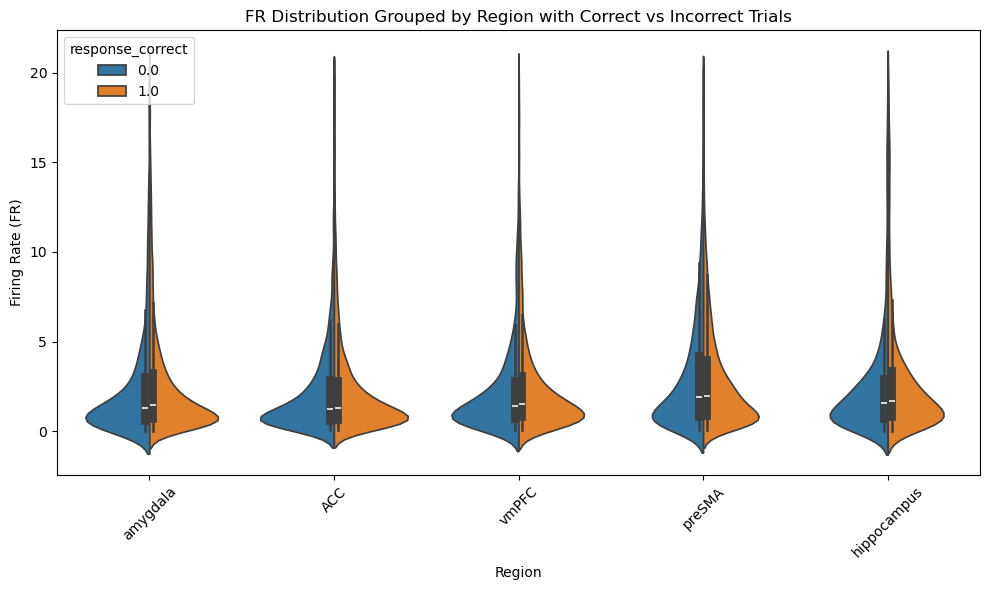

In [136]:
correct_vs_incorrect_counts = df_recognition.groupby('region')['response_correct'].value_counts().unstack(fill_value=0)
correct_vs_incorrect_counts.columns = ['Incorrect', 'Correct']
print(correct_vs_incorrect_counts)

plt.figure(figsize=(10, 6))

# Plot using a violin plot with 'response_correct' hue
sns.violinplot(data=df_recognition, x='region', y='FR', hue='response_correct', split=True)

# Add title and labels
plt.title('FR Distribution Grouped by Region with Correct vs Incorrect Trials')
plt.xlabel('Region')
plt.ylabel('Firing Rate (FR)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

response_category  Confident & Correct  Other
region                                       
ACC                               3663   4242
amygdala                          7975   8138
hippocampus                       4442   4499
preSMA                            5275   5236
vmPFC                             3034   3004


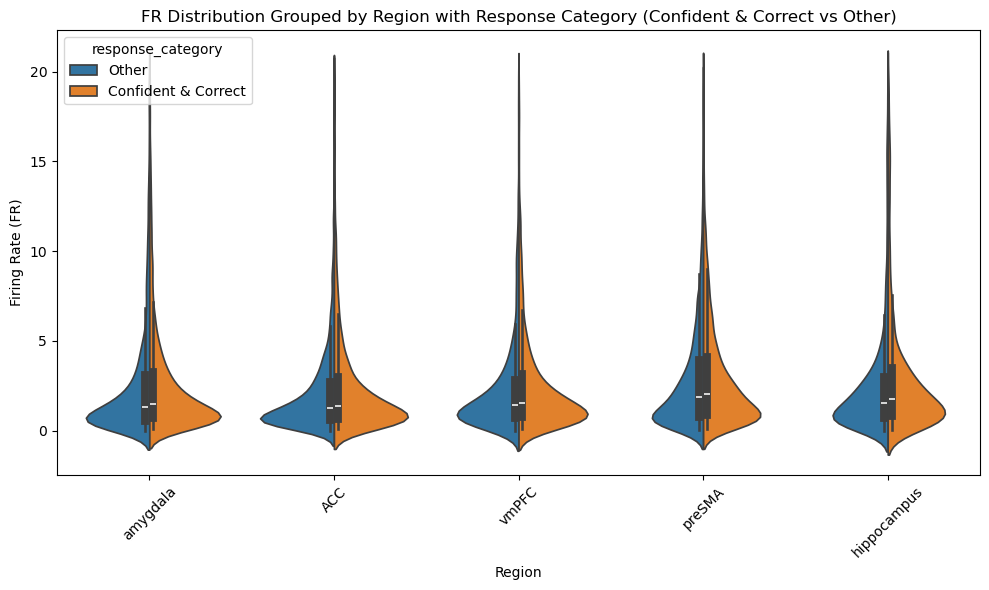

In [137]:
# Step 1: Create a new column for categorization based on the condition (response_confidence == 3 and correct == 1)
df_recognition['response_category'] = df_recognition.apply(lambda row: 'Confident & Correct' if row['response_confidence'] == 3 and row['response_correct'] == 1 else 'Other', axis=1)

# Step 2: Group by 'region' and sum up trials for each response category
response_category_counts = df_recognition.groupby('region')['response_category'].value_counts().unstack(fill_value=0)

# Print the count of trials for each response category for each region
print(response_category_counts)

# Step 3: Plot the distribution of firing rates (FR) by 'region' with hue 'response_category'
plt.figure(figsize=(10, 6))

# Plot using a violin plot with 'response_category' hue
sns.violinplot(data=df_recognition, x='region', y='FR', hue='response_category', split=True)

# Add title and labels
plt.title('FR Distribution Grouped by Region with Response Category (Confident & Correct vs Other)')
plt.xlabel('Region')
plt.ylabel('Firing Rate (FR)')
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()